# Rainbow Six Siege Operator Classification

Problem: Given the details such as armor, speed etc, we try to predic the role of a given operator as an attacker or a defender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('operators.csv')
df

,Organization,Name,Role,Armor,Speed,Difficulty,Primary1,Primary2,Primary3,Secondary1,Secondary2,Gadget1,Gadget2
0,APCA,AMARU,ATTACKER,2,2,2,G8A1,SUPERNOVA,NaN,ITA12S,SMG-11,CLAYMORE,STUN GRENADE
1,APCA,GOYO,DEFENDER,2,2,2,VECTOR .45 ACP,TCSG12,NaN,P229,NaN,IMPACT GRENADE,NITRO CELL
2,JAEGER CORPS,NOKK,ATTACKER,2,2,3,FMG-9,SIX12 SD,NaN,5.7 USG,D-50,CLAYMORE,BREACH CHARGE
3,JAEGER CORPS,WARDEN,DEFENDER,3,1,2,M590A1,MPX,NaN,P-10C,SMG-12,DEPLOYABLE SHIELD,BARBED WIRE
4,SASR,MOZZIE,DEFENDER,2,2,2,COMMANDO 9,P10 RONI,NaN,SUPER SHORTY,SDP 9MM,BARBED WIRE,NITRO CELL
5,SASR,GRIDLOCK,ATTACKER,3,1,1,F90,M249 SAW,NaN,SUPER SHORTY,SDP 9MM,SMOKE GRENADE,BREACH CHARGE
6,GIGR,NOMAD,ATTACKER,2,2,3,AK-74M,ARX200,NaN,.44 MAG SEMI-AUTO,NaN,STUN GRENADE,BREACH CHARGE
7,GIGR,KAID,DEFENDER,3,1,2,AUG A3,TCSG12,NaN,.44 MAG SEMI-AUTO,NaN,NITRO CELL,IMPACT GRENADE
8,MPS,CLASH,DEFENDER,3,1,3,CCE SHIELD,NaN,NaN,P-10C,SPSMG9,BARBED WIRE,IMPACT GRENADE
9,MPS,MAVERICK,ATTACKER,1,3,2,AR-15.50,M4,NaN,1911 TACOPS,NaN,STUN GRENADE,CLAYMORE


C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

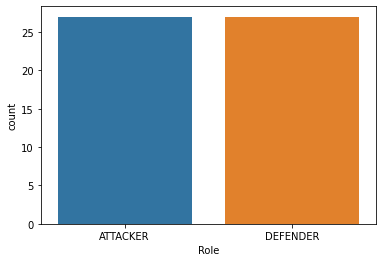

In [3]:
sns.countplot(df["Role"])

We find an extremely balanced dataset with 25 attackers and 25 defenders each

<AxesSubplot:>

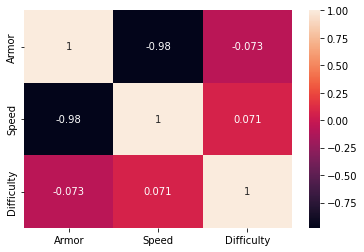

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df.isnull().sum()

Organization     0
Name             0
Role             0
Armor            0
Speed            0
Difficulty       0
Primary1         0
Primary2         5
Primary3        45
Secondary1       0
Secondary2      20
Gadget1          0
Gadget2          0
dtype: int64

In [6]:
df.drop(columns=["Primary3","Secondary2","Primary1","Primary2","Secondary1","Secondary2","Organization"],inplace=True)

In [7]:
df['Gadget 1']

KeyError: 'Gadget 1'

In [ ]:
df.head()

,Role,Armor,Speed,Difficulty,Gadget1,Gadget2
0,ATTACKER,2,2,2,0,STUN GRENADE
1,DEFENDER,2,2,2,1,NITRO CELL
2,ATTACKER,2,2,3,0,BREACH CHARGE
3,DEFENDER,3,1,2,2,BARBED WIRE
4,DEFENDER,2,2,2,3,NITRO CELL


C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

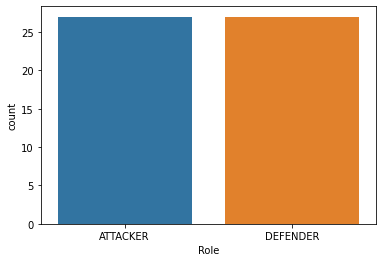

In [ ]:
sns.countplot(df["Role"])

In [ ]:
df.isnull().sum()

Name          0
Role          0
Armor         0
Speed         0
Difficulty    0
Gadget1       0
Gadget2       0
dtype: int64

In [ ]:
# roles={
#     "ATTACKER":1,
#     "DEFENDER":0
# }

# df.replace({"Role":roles},inplace=True)

In [ ]:
gadgets={
    "CLAYMORE":0,
    "IMPACT GRENADE":1,
    'DEPLOYABLE SHIELD':2,
    'BARBED WIRE':3,
    'SMOKE GRENADE':4,
    'STUN GRENADE':5,
    'NITRO CELL':6,
    'BREACH CHARGE':7,
    'BULLETPROOF CAMERA':8,
    'FRAG GRENADE':9,
    ' BULLETPROOF CAMERA':8,
}
df.replace({"Gadget1":gadgets},inplace=True)

In [ ]:
df.drop(columns=["Name"],inplace=True)

<AxesSubplot:>

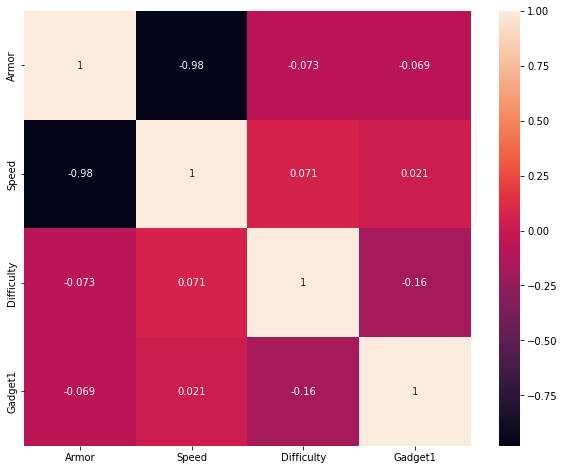

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=5)
X=df.drop(columns=["Role"])
y=df["Role"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
dtc.fit(X_train,y_train)

ValueError: could not convert string to float: 'CLAYMORE'

In [ ]:
predictions= dtc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
print("Accuracy: ",accuracy_score(y_test,predictions)*100,"%")

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier(max_iter=100,activation='logistic')

In [ ]:
mlp.fit(X_train,y_train)

In [ ]:
mlp_predictions=mlp.predict(X_test)
mlp_predictions

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,mlp_predictions))

In [ ]:
from sklearn.metrics import accuracy_score
def getBestIterations():
    iterations=[300,400,500,600,700,800,900,1000,1100,1200]
    prediction_accuracy=[]
    for iters in iterations:
        mlp=MLPClassifier(max_iter=iters,activation="tanh",learning_rate='adaptive')
        mlp.fit(X_train,y_train)
        pred_i=mlp.predict(X_test)
        prediction_accuracy.append(accuracy_score(y_test,pred_i))
    return [prediction_accuracy,iterations]
        

In [ ]:
accuracyValues,iterations=getBestIterations()

In [ ]:
accuracyValues

In [ ]:
max_iters=accuracyValues.index(max(accuracyValues))
activation="tanh"

In [ ]:
mlp_model=MLPClassifier(max_iter=max_iters,activation=activation)

In [ ]:
mlp_model.fit(X_train,y_train)

In [ ]:
prediction=mlp_model.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

In [ ]:
accuracyValues=np.array(accuracyValues)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(iterations,accuracyValues*100)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

In [ ]:
print(confusion_matrix(y_test,prediction))

In [ ]:
print(confusion_matrix(prediction,y_test))